# Valentine's Day Consumer Data

## Import Libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## Import Fonts

In [ ]:
from matplotlib import rcParams
from matplotlib import font_manager

In [ ]:
font_dirs =  ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

In [ ]:
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [ ]:
rcParams['font.family'] = 'Roboto'
rcParams['font.size'] = '12'

## Load data

In [3]:
url  = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-02-13/historical_spending.csv"
raw = pd.read_csv(url)

## Data Wrangling

In [5]:
raw.head(3)

,Year,PercentCelebrating,PerPerson,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
0,2010,60,103.00,8.60,12.33,21.52,5.91,23.76,10.93,8.42
1,2011,58,116.21,10.75,12.62,26.18,8.09,24.86,12.00,11.21
2,2012,59,126.03,10.85,13.49,29.60,6.93,25.66,10.42,8.43


In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                13 non-null     int64  
 1   PercentCelebrating  13 non-null     int64  
 2   PerPerson           13 non-null     float64
 3   Candy               13 non-null     float64
 4   Flowers             13 non-null     float64
 5   Jewelry             13 non-null     float64
 6   GreetingCards       13 non-null     float64
 7   EveningOut          13 non-null     float64
 8   Clothing            13 non-null     float64
 9   GiftCards           13 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 1.1 KB


### Pivoting

In [11]:
df1 = pd.melt(raw, id_vars=['Year', 'PercentCelebrating',  'PerPerson'], var_name='Type', value_name='Amount')
df1.head(3)

,Year,PercentCelebrating,PerPerson,Type,Amount
0,2010,60,103.00,Candy,8.60
1,2011,58,116.21,Candy,10.75
2,2012,59,126.03,Candy,10.85


### Updating Type Column: np.where

In [21]:
df1["Type2"] = np.where(
    df1["Type"] == "GreetingCards", "Greeting Cards",
    np.where(
        df1["Type"] == "EveningOut", "Evening Out",
        np.where(
            df1["Type"] == "GiftCards", "Gift Cards" , 
            df1["Type"])))

df1.head(3)

,Year,PercentCelebrating,PerPerson,Type,Amount,Type2
0,2010,60,103.00,Candy,8.60,Candy
1,2011,58,116.21,Candy,10.75,Candy
2,2012,59,126.03,Candy,10.85,Candy


### Updating Type Column: pd.rename

In [22]:
raw.head(2)

,Year,PercentCelebrating,PerPerson,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
0,2010,60,103.00,8.60,12.33,21.52,5.91,23.76,10.93,8.42
1,2011,58,116.21,10.75,12.62,26.18,8.09,24.86,12.00,11.21


In [24]:
df2 = raw.rename(
    columns={
        "PercentCelebrating": "Percent",  
        "GreetingCards" : "Greeting Cards",	
        "EveningOut" :	"Evening Out",  
        "GiftCards" : "Gift Cards"}
        ).melt(
            id_vars=['Year', 'Percent',  'PerPerson'], 
            var_name='Type', 
            value_name='Amount')

df2 .head(3)

,Year,Percent,PerPerson,Type,Amount
0,2010,60,103.00,Candy,8.60
1,2011,58,116.21,Candy,10.75
2,2012,59,126.03,Candy,10.85


## Viz

### Average Spending Per Year

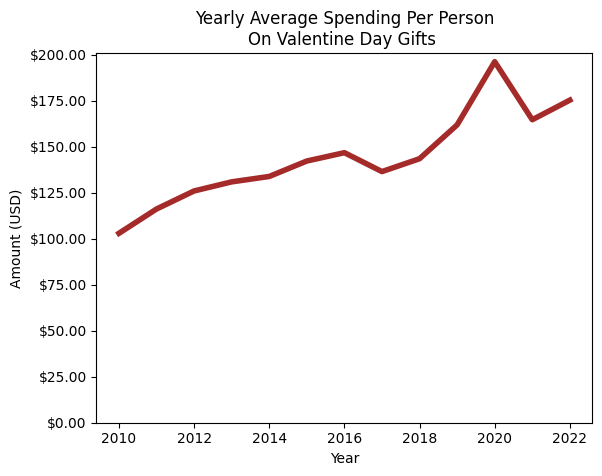

In [136]:
yearly = df2.groupby("Year")["PerPerson"].mean();
yearly.plot.line(
    color = 'brown', linewidth  = 4, 
    title =  "Yearly Average Spending Per Person\nOn Valentine Day Gifts ",
    ylabel = "Amount (USD)",
    ylim=(0)
    ).yaxis.set_major_formatter('${x:1.2f}')

### Perccentage  Celebrating Per Year

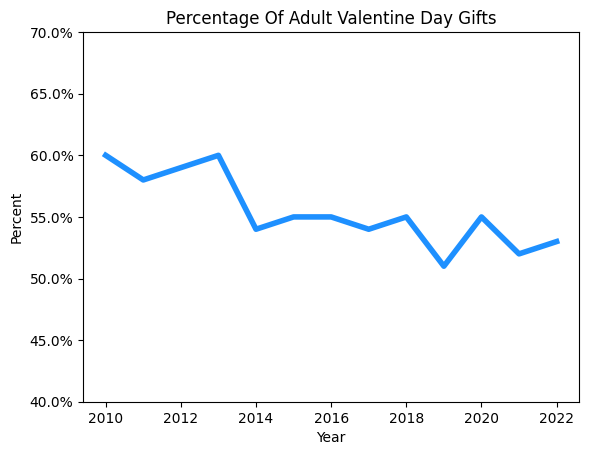

In [135]:
celb_df = raw.loc[:, ["Year",	"PercentCelebrating"]].set_index("Year")
celb_df["PercentCelebrating"]  =  celb_df["PercentCelebrating"]/100

celb_df.plot.line(
    color = 'dodgerblue', linewidth  = 4, legend = False,
    title =  "Percentage Of Adult Valentine Day Gifts",
    ylabel = "Percent",
    ylim=(.4, .7)
    ).yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

### Spending Per Year By Type

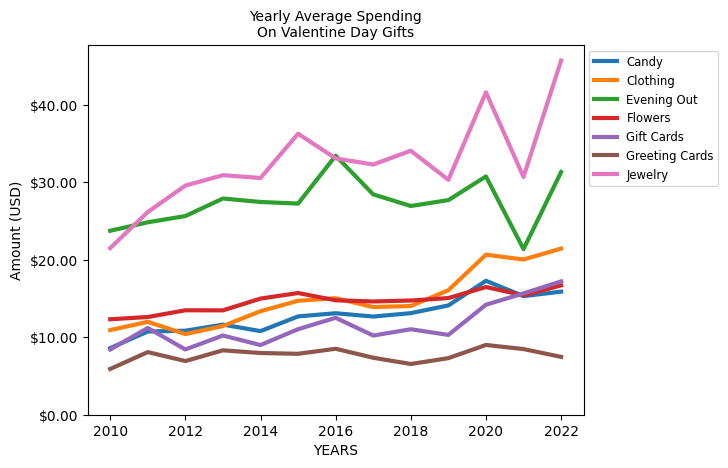

In [138]:
yearly_type = df2.loc[:, ["Year", "Type", "Amount"]]
ytype =  yearly_type.pivot(
    index='Year', 
    columns='Type', values='Amount')

ytype.plot.line(linewidth  = 3,  ylim=(0))

fig =plt.gca()
plt.title("Yearly Average Spending\nOn Valentine Day Gifts")
plt.xlabel("YEARS")
plt.ylabel("Amount (USD)")
fig.title.set_size(10)
plt.legend(
        bbox_to_anchor=(1.0, 1.0),
        fontsize="small",
    )
fig.yaxis.set_major_formatter('${x:1.2f}')
plt.show()

###  Matplotlib.Pyplot

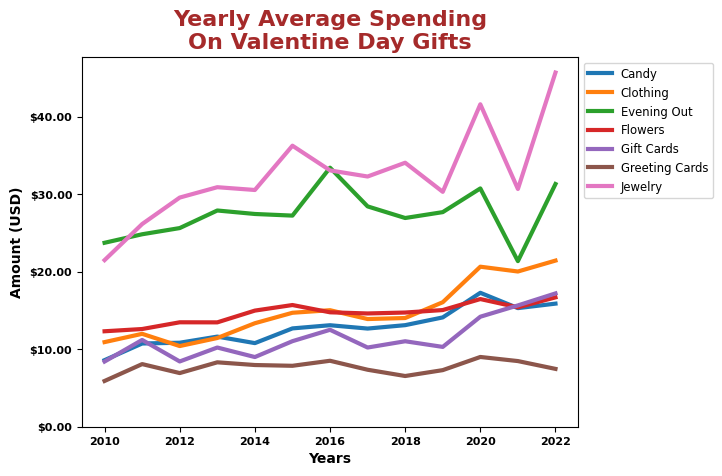

In [155]:

fig = ytype.plot(kind="line", linewidth  = 3,  ylim=(0))

fig.legend(
        bbox_to_anchor=(1.0, 1.0),
        fontsize="small",
    )
plt.title("Yearly Average Spending\nOn Valentine Day Gifts", fontsize = 16, color = "brown", fontweight="bold")
plt.ylabel("Amount (USD)", fontweight="bold")
plt.xlabel("Years", fontweight="bold")
plt.yticks(fontsize=8, fontweight="bold")
plt.xticks(fontsize=8, fontweight="bold")
fig.yaxis.set_major_formatter('${x:1.2f}')



### Valentine Gifts Average Cost

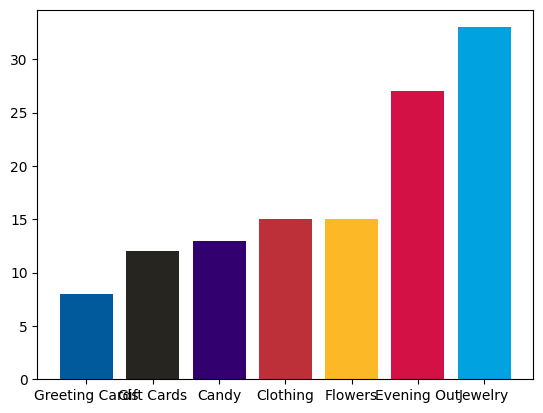

In [188]:
colors=['#005A9C',  '#27251F', '#33006F', '#BD3039', '#FDB827', '#D31145', '#00A3E0']
#   '#C41E3A', '#33006F', '#C6011F', '#004687', '#CE1141', '#134A8E', '#27251F', '#FDB827', '#0C2340', '#FD5A1E', '#00A3E0', '#ffc52f'
fig, ax = plt.subplots()
ax.bar(bytype["Type"], bytype["Amount"], color = colors )
plt.show()

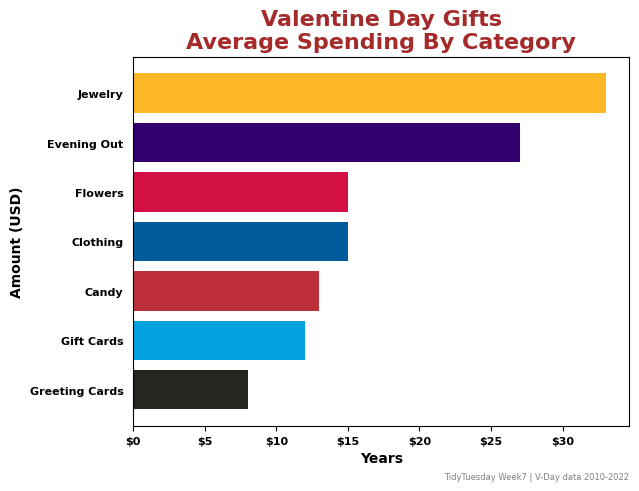

In [219]:
colors_ord=['#27251F', '#00A3E0', '#BD3039', '#005A9C',   '#D31145', '#33006F',  '#FDB827']


fig, ax = plt.subplots()
ax.barh(bytype["Type"], bytype["Amount"], color = colors_ord )

plt.title("Valentine Day Gifts\nAverage Spending By Category", fontsize = 16, color = "brown", fontweight="bold")
plt.ylabel("Amount (USD)", fontweight="bold")
plt.xlabel("Years", fontweight="bold")
plt.yticks(fontsize=8, fontweight="bold")
plt.xticks(fontsize=8, fontweight="bold")
ax.xaxis.set_major_formatter('${x:1.0f}')

fig.text(.9, .0001, "TidyTuesday Week7 | V-Day data 2010-2022", ha='right', fontsize=6, color = "grey")

plt.tick_params(left = False) # bottom = False, , labelbottom  = False
plt.show()